In [1]:
%run common.ipynb

Why use a programming language for data manipulation instead of Spreadsheet?
1. To keep track of manipulations
2. To automate manipulations 

## Pandas

`pandas` is a fast, powerful, flexible, and easy to use open-source data analysis and manipulation tool,
built on top of the Python programming language.

Pandas allows us to work with tabular data similar to Spreadsheets.

We refer to the documentation for pandas at https://pandas.pydata.org/


## Import Pandas

In case you haven't installed pandas, 
1. open your terminal/command prompt and enter the command `pip install pandas`.
2. In a new cell type `!pip install pandas`


To import pandas into your notebook, use `import pandas as pd`

In [2]:
# !pip install pandas

import pandas as pd # it is common to abbreviate pandas as pd

## Terminologies

### DataFrame

In Pandas the data tables are called `DataFrames`. A DataFrame is a two-dimensional table with labeled axes. Let's compare it to an Excel(The microsoft product) spreadsheet. 

<img src="images/a_dataframe.PNG"/>


### Row

The horizontal axes is the `row`. Each row is identified by it's `index`.

<img src="images/a_row.PNG"/>

### Column

The vertical axes is the `column`. Each column is identified by its `column label`.

<img src="images/a_column.PNG"/>

Each column or generally a list of values is a `Series` in pandas. A dataframe can be also viewed as a dictionary of `Series` objects. 

## Load a dataset

Pandas allows us to load datasets stored in different formats (csv, excel, sql, json, ...) into python. To read a file into a dataframe we use 

`pd.read_*` and replace `*` with the desired format. The source path can be a `url` or a path to a file on your machine.

In [3]:
# load a dataset

source = '../data/weather_data_sample.csv'

df = pd.read_csv(source)

If the previous cell ran without an error we've successfully loaded the dataset as a pandas DataFrame!

## Inspect your DataFrame

### Shape

The next step is to inspect your DataFrame. So we may be first interested to know the size of our dataset. How many rows and columns are there?

In [4]:
df.shape

(31, 4)

The output (31, 4) means that the DataFrame has 31 rows and 4 columns

### head and tail

Generally, datasets are huge and cannot be viewed all at once. So it is convenient to take glimpses of our DataFrame. We can view the first few rows and first few columns using `df.head()` and `df.tail()`.

In [5]:
df.head()

,STATION,DATE,TMAX,TMIN
0,GHCND:USC00327027,20100101,-178,-311
1,GHCND:USC00327027,20100102,-244,-322
2,GHCND:USC00327027,20100103,-194,-289
3,GHCND:USC00327027,20100104,-167,-200
4,GHCND:USC00327027,20100105,-133,-167


In [6]:
df.tail()

,STATION,DATE,TMAX,TMIN
26,GHCND:USC00327027,20100127,-167,-222
27,GHCND:USC00327027,20100128,-167,-283
28,GHCND:USC00327027,20100129,-189,-283
29,GHCND:USC00327027,20100130,-156,-267
30,GHCND:USC00327027,20100131,-150,-272


We see that the dataset records the minimum and maximum temperature measured for each day of January 2010. We see that the temperature is measured in Kelvin (for them to be meaningful anyway).  However, we do not know if all records are from the same station or for different ones. 
 

### Type Conversions
We've taken a look at the DataFrame. Let's see the datatype of each column.


Documentation: https://pandas.pydata.org/docs/user_guide/basics.html#dtypes

In [7]:
df.dtypes

STATION    object
DATE        int64
TMAX        int64
TMIN        int64
dtype: object

Here, the Date is stored as an integer data type which will not allow us to perform DateTime calculations. We will convert the DATE column to a DateTime object. We will learn about **DateTime objects** in a coming lab. For now, we will ignore the code below and inspect the output

#### to datetime datatype

In [8]:
df['DATE'] = pd.to_datetime(df['DATE'], format='%Y%m%d')
df.head()

,STATION,DATE,TMAX,TMIN
0,GHCND:USC00327027,2010-01-01,-178,-311
1,GHCND:USC00327027,2010-01-02,-244,-322
2,GHCND:USC00327027,2010-01-03,-194,-289
3,GHCND:USC00327027,2010-01-04,-167,-200
4,GHCND:USC00327027,2010-01-05,-133,-167


Much better! We observe that the dates are properly formatted.

#### To String Datatype

It is advisable to convert `object` datatypes to `string` if it is pre-emptively known that the column contains only text.

In [9]:
df['STATION']  = df['STATION'].astype('string')
df.dtypes

STATION            string
DATE       datetime64[ns]
TMAX                int64
TMIN                int64
dtype: object

### Descriptive statistics

It is informative to know some information about the distribution of each column in the DataFrame. Pandas conveniently computes the descriptive statistics for us. Let's now view the descriptive statistics for all the columns in the DataFrame.

In [10]:
df.describe()

,TMAX,TMIN
count,31.000000,31.000000
mean,-101.677419,-181.967742
std,84.330061,98.271896
min,-244.000000,-328.000000
25%,-167.000000,-275.000000
50%,-117.000000,-172.000000
75%,-30.500000,-91.500000
max,39.000000,-11.000000


Oops! The STATION and DATE columns are missing! This is because by default, the `.describe` method computes the descriptive statistics for numeric data types only. We'll see how we deal with **text data** later in the course.  Even if the descriptive statistics suited for numerical data do not make sense for text data, let's take a look. 

In [11]:
df.describe(datetime_is_numeric=True, # to treat datetime as numeric data. 
            include='all' # include string/object datatypes
           )

,STATION,DATE,TMAX,TMIN
count,31,31,31.000000,31.000000
unique,1,NaN,NaN,NaN
top,GHCND:USC00327027,NaN,NaN,NaN
freq,31,NaN,NaN,NaN
mean,NaN,2010-01-16 00:00:00,-101.677419,-181.967742
min,NaN,2010-01-01 00:00:00,-244.000000,-328.000000
25%,NaN,2010-01-08 12:00:00,-167.000000,-275.000000
50%,NaN,2010-01-16 00:00:00,-117.000000,-172.000000
75%,NaN,2010-01-23 12:00:00,-30.500000,-91.500000
max,NaN,2010-01-31 00:00:00,39.000000,-11.000000


We observe that rows indexed with `unique, top, freq` has been added. If a statistic is not applicable to a column , we observe a `NaN`. 

## Change Index

Rows are by default indexed by positive integers. For this dataset, what do you think is the more suitable index? We can change the index of a DataFrame using the `.set_index()` method.

In [12]:
df.set_index('DATE')

,STATION,TMAX,TMIN
DATE,,,
2010-01-01,GHCND:USC00327027,-178,-311
2010-01-02,GHCND:USC00327027,-244,-322
2010-01-03,GHCND:USC00327027,-194,-289
2010-01-04,GHCND:USC00327027,-167,-200
2010-01-05,GHCND:USC00327027,-133,-167
2010-01-06,GHCND:USC00327027,-133,-172
2010-01-07,GHCND:USC00327027,-150,-278
2010-01-08,GHCND:USC00327027,-233,-328
2010-01-09,GHCND:USC00327027,-233,-322


That's great ! the dataset makes more sense now. But have the changes we made been saved to the DataFrame? Let's take a look at the dataset



In [13]:
df.head()

,STATION,DATE,TMAX,TMIN
0,GHCND:USC00327027,2010-01-01,-178,-311
1,GHCND:USC00327027,2010-01-02,-244,-322
2,GHCND:USC00327027,2010-01-03,-194,-289
3,GHCND:USC00327027,2010-01-04,-167,-200
4,GHCND:USC00327027,2010-01-05,-133,-167


This is a common rookie mistake you are likely to make several times! When the `.set_index()` is applied to our data frame, the changes are made and returned as a new DataFrame. To save changes, we must assign the changes we made to our variable `df` or set the `inplace` argument to `True`

In [14]:
# df = df.set_index('DATE')

df.set_index('DATE', inplace=True) 
df.head()

,STATION,TMAX,TMIN
DATE,,,
2010-01-01,GHCND:USC00327027,-178,-311
2010-01-02,GHCND:USC00327027,-244,-322
2010-01-03,GHCND:USC00327027,-194,-289
2010-01-04,GHCND:USC00327027,-167,-200
2010-01-05,GHCND:USC00327027,-133,-167


## Exploratory data visualization

The next important step in inspecting our data is to visualize it. We have a separate course on **Exploratory Data Visualization**  which dives deep into different data visualization techniques. Pandas plots the data using the default backend plotting library - which is `matplotlib`. We can change the backend plotting libraries which we will not cover in this course. 

### Trends

Here we will brush through the basics to get you going. With time series data it is generally informative to observe trends, for which `line plots` are useful.

<AxesSubplot:xlabel='DATE'>

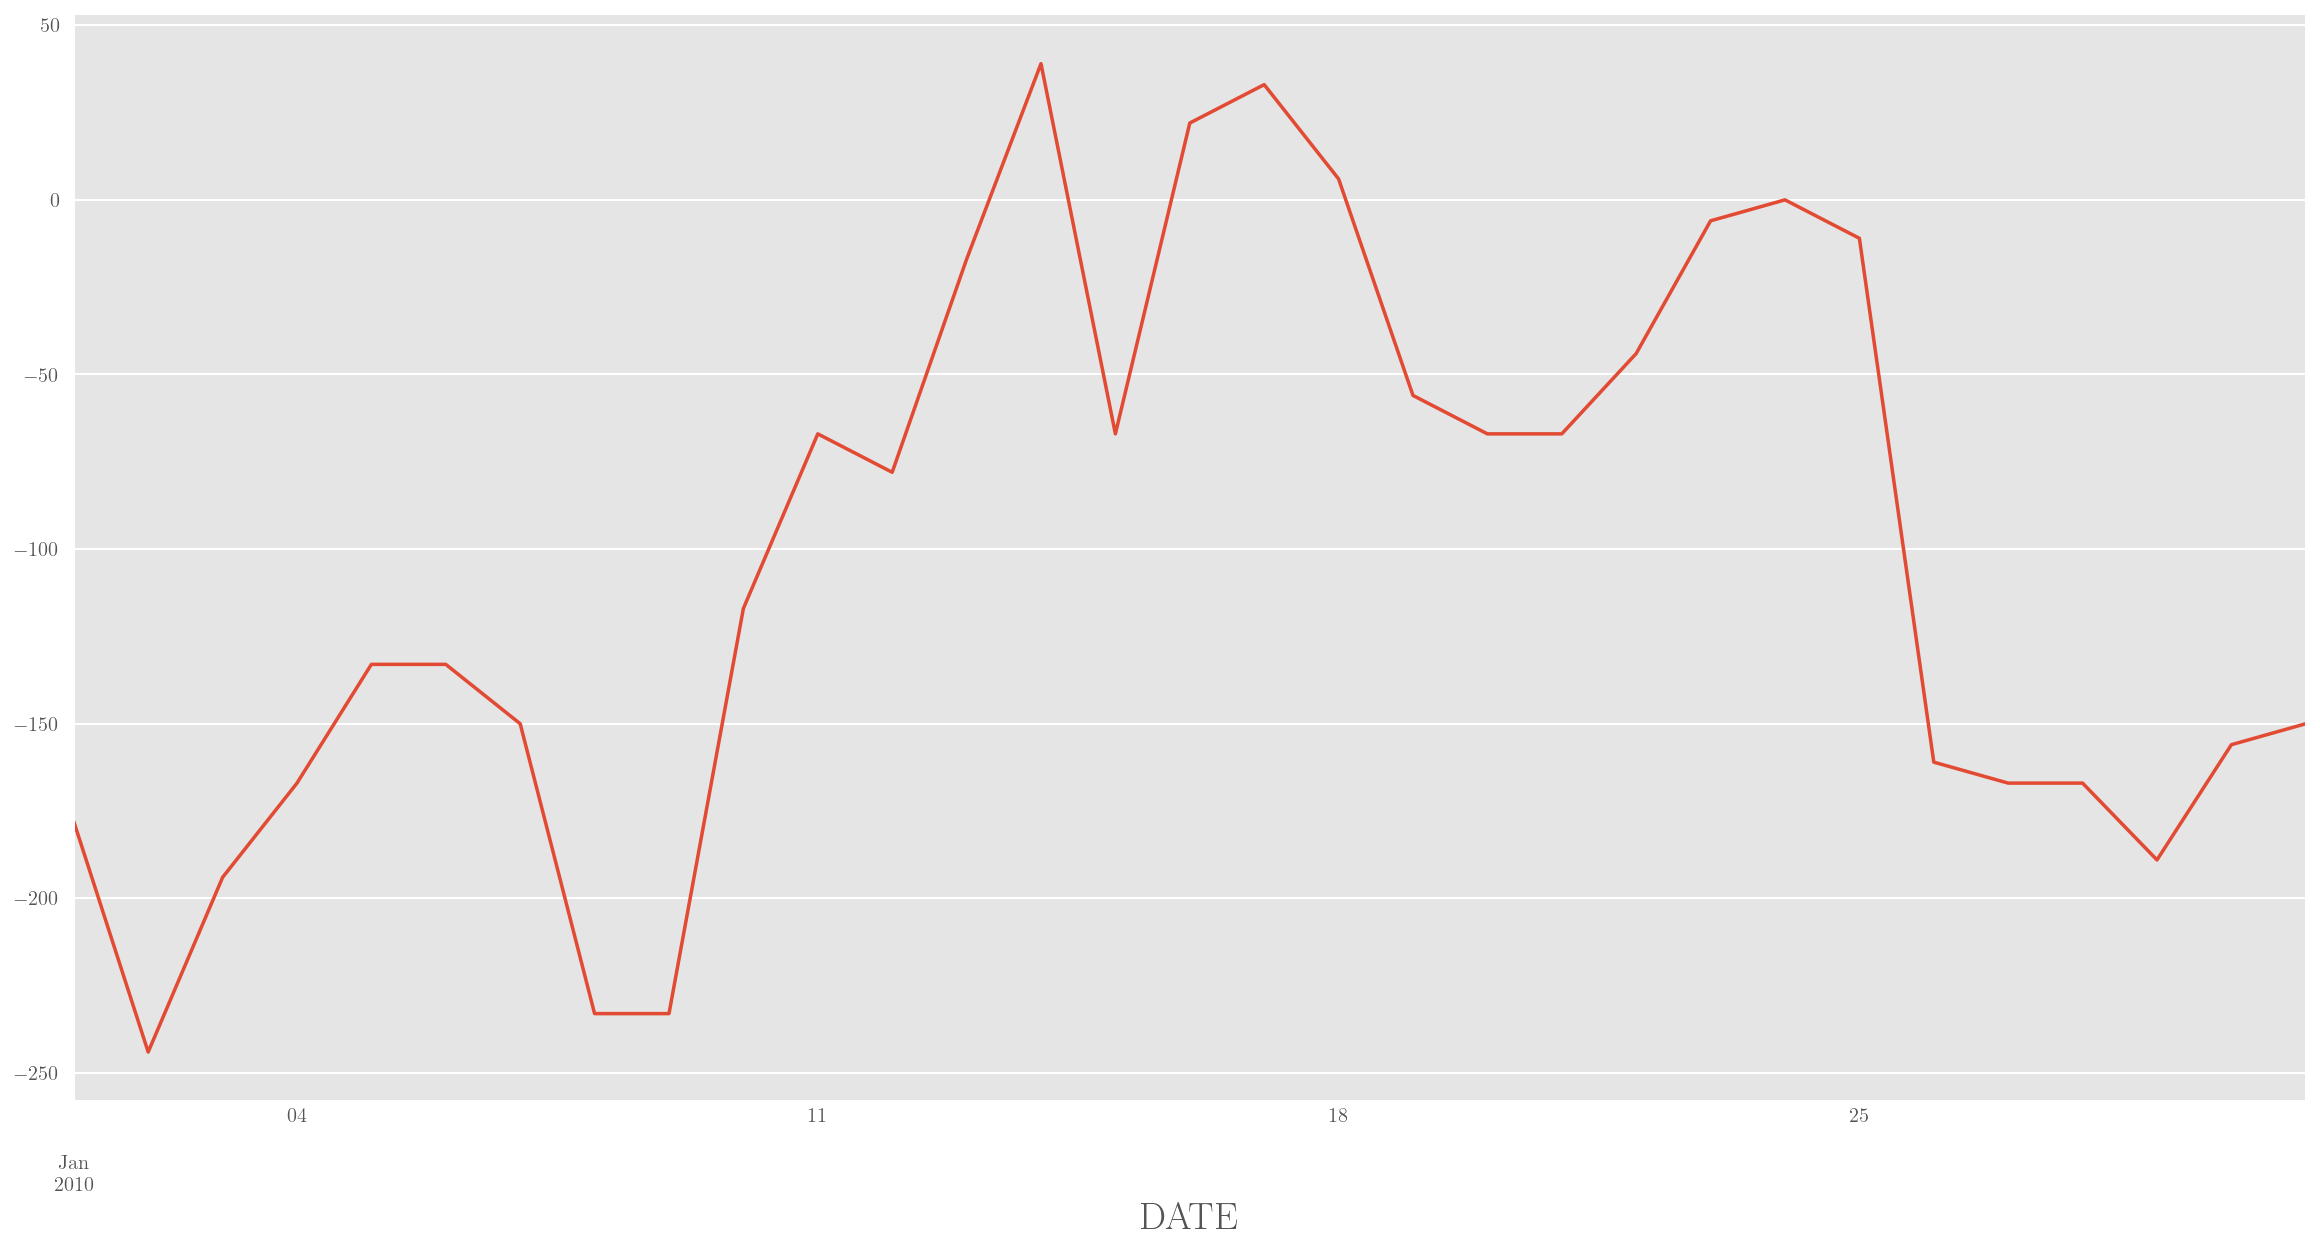

In [15]:
df['TMAX'].plot()

<AxesSubplot:xlabel='DATE'>

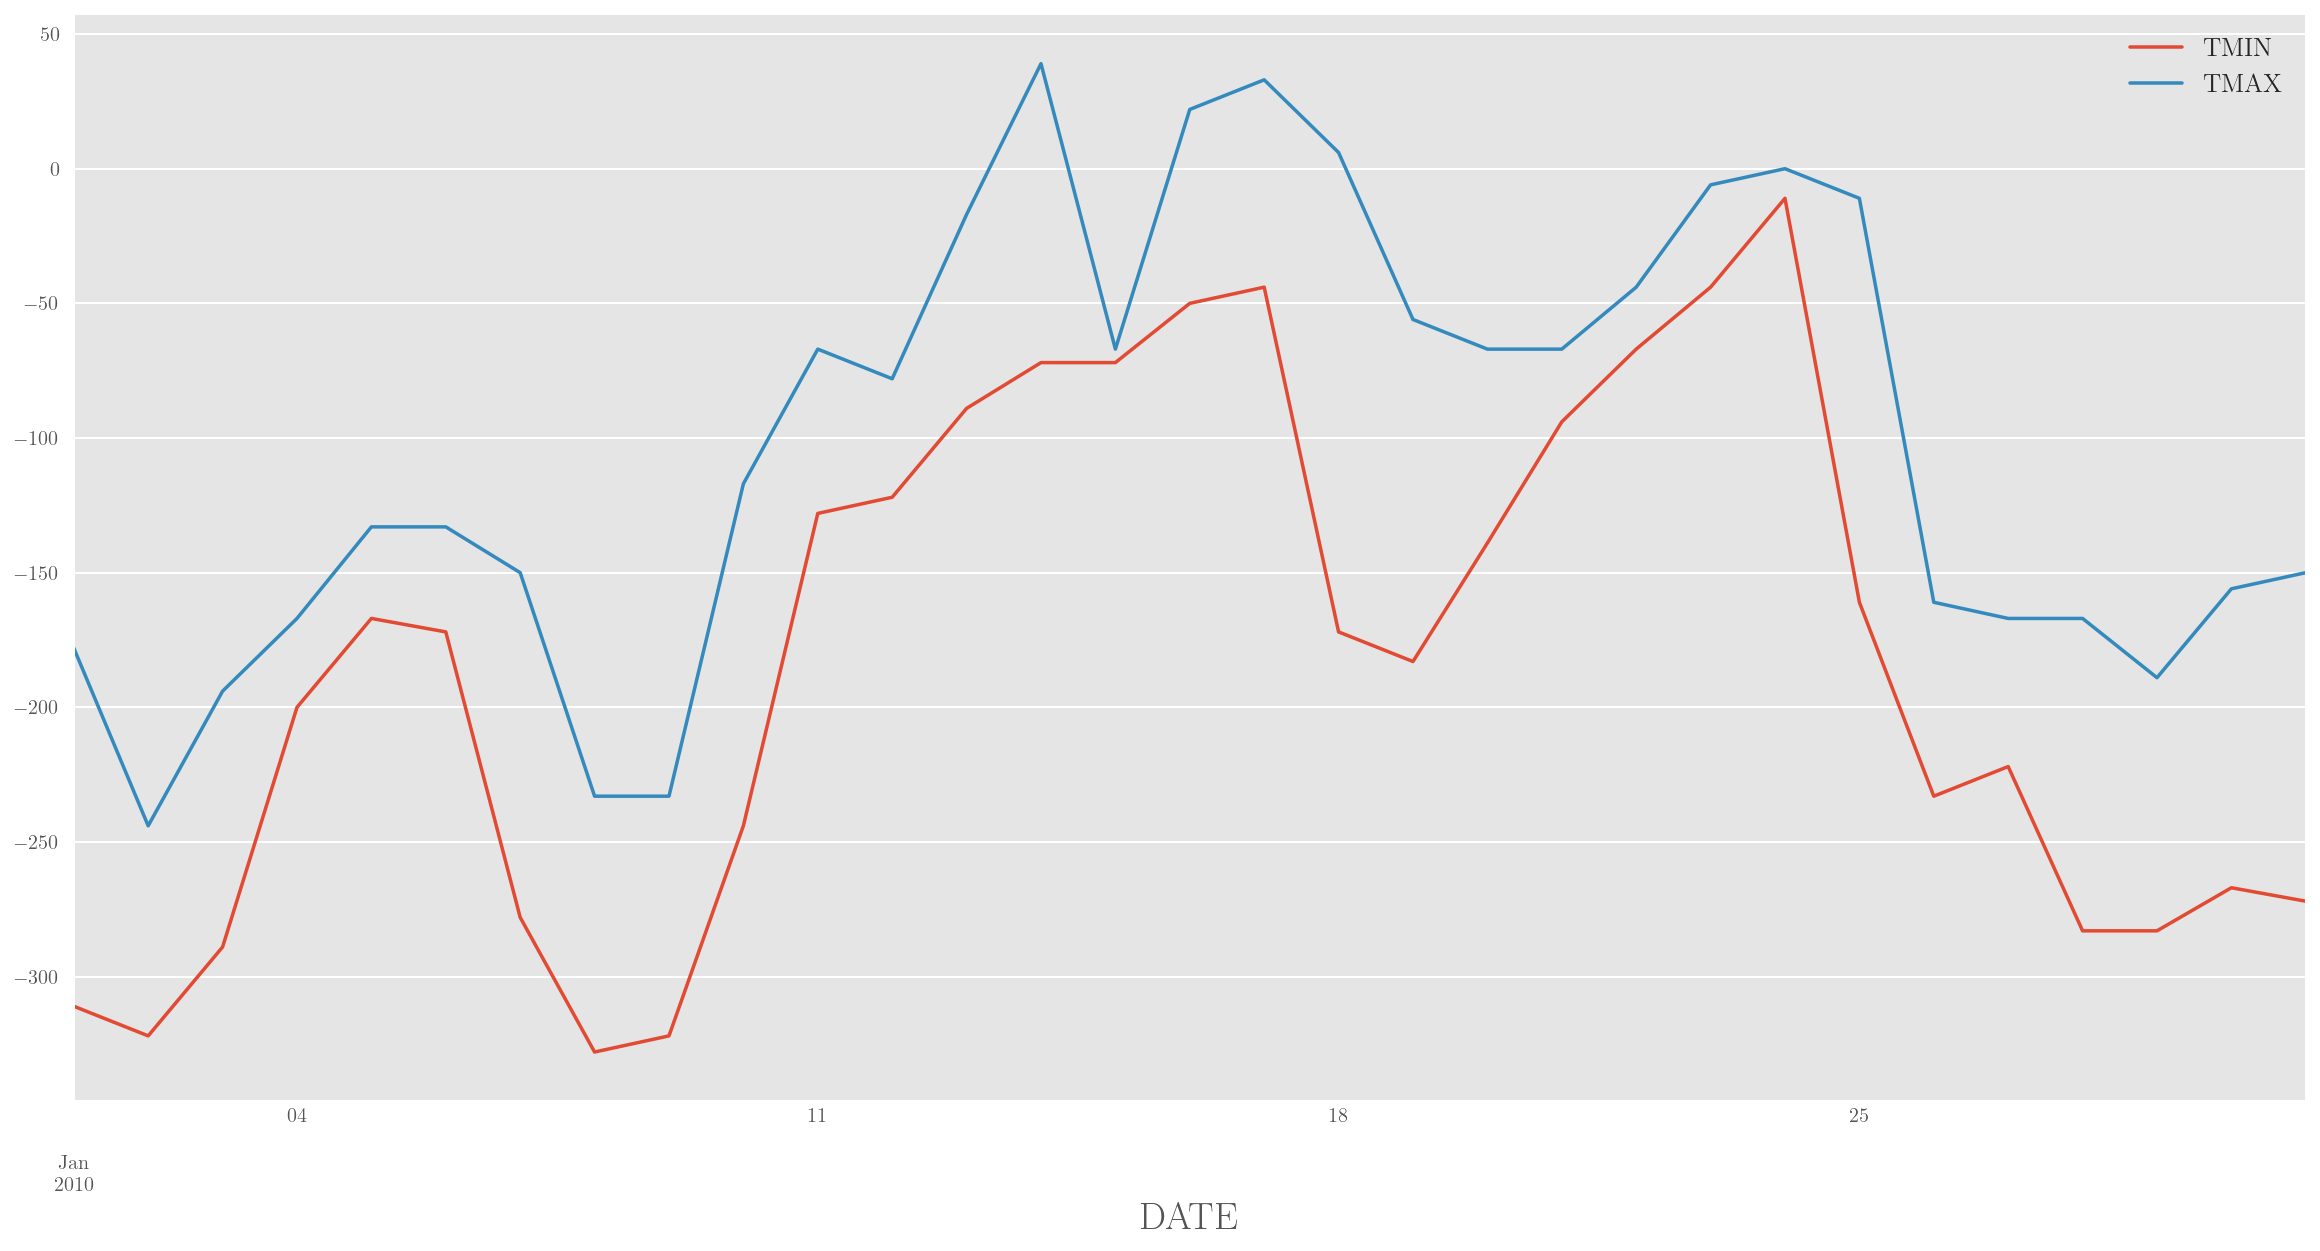

In [16]:
df[['TMIN', 'TMAX']].plot()

In the piece of code above, we've taken a subset of the DataFrame to plot. We'll learn the different **Row and Column** operations in the following lab.

### Density 
The distribution of the variables in a dataset can be visualized using histograms.

<AxesSubplot:>

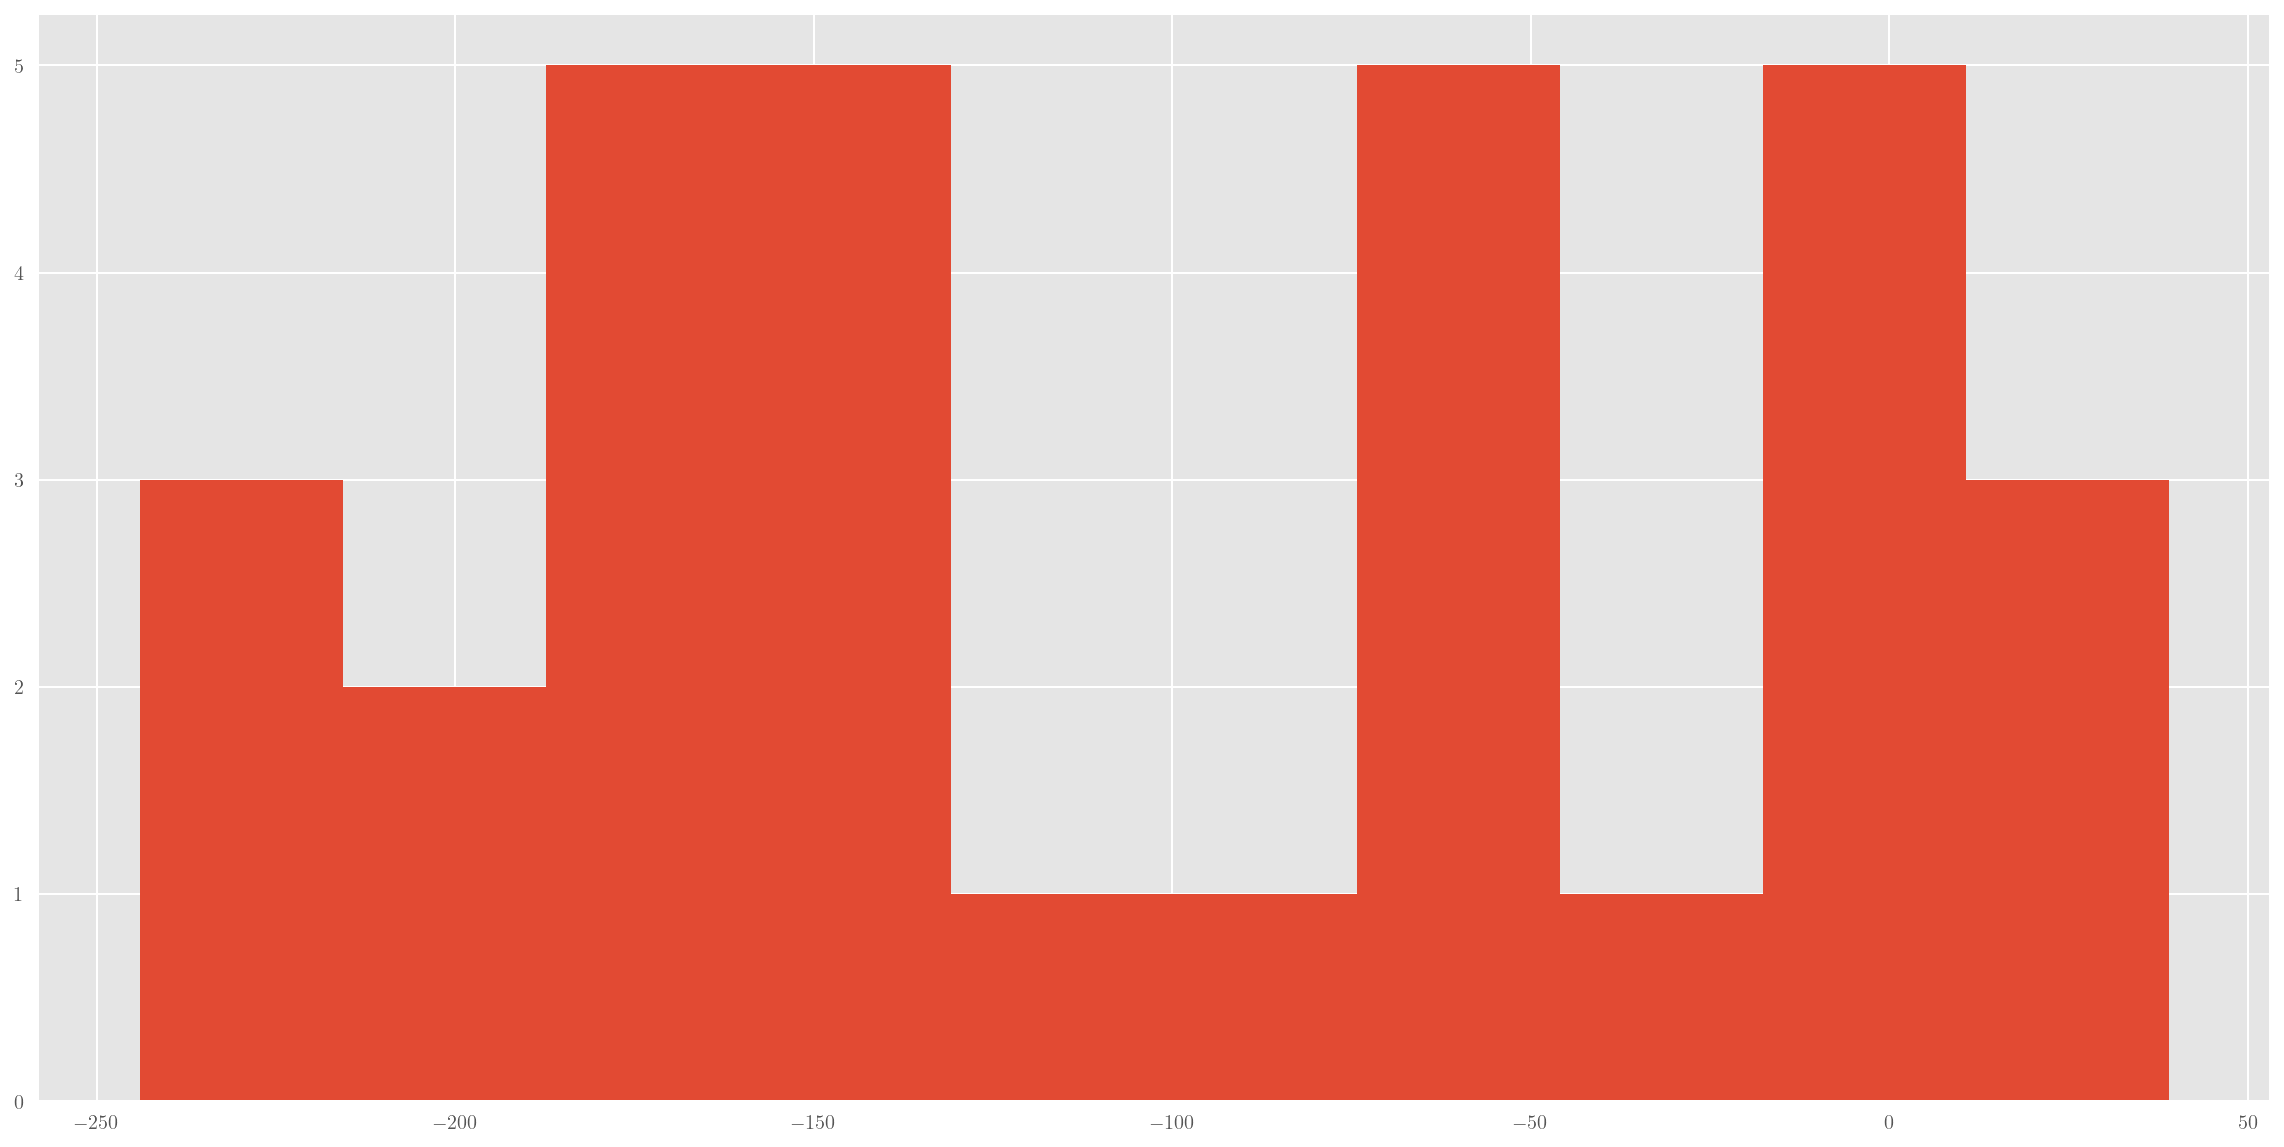

In [17]:
df['TMAX'].hist()

The density can also be visulized using the Kernel Density plots. 

<AxesSubplot:ylabel='Density'>

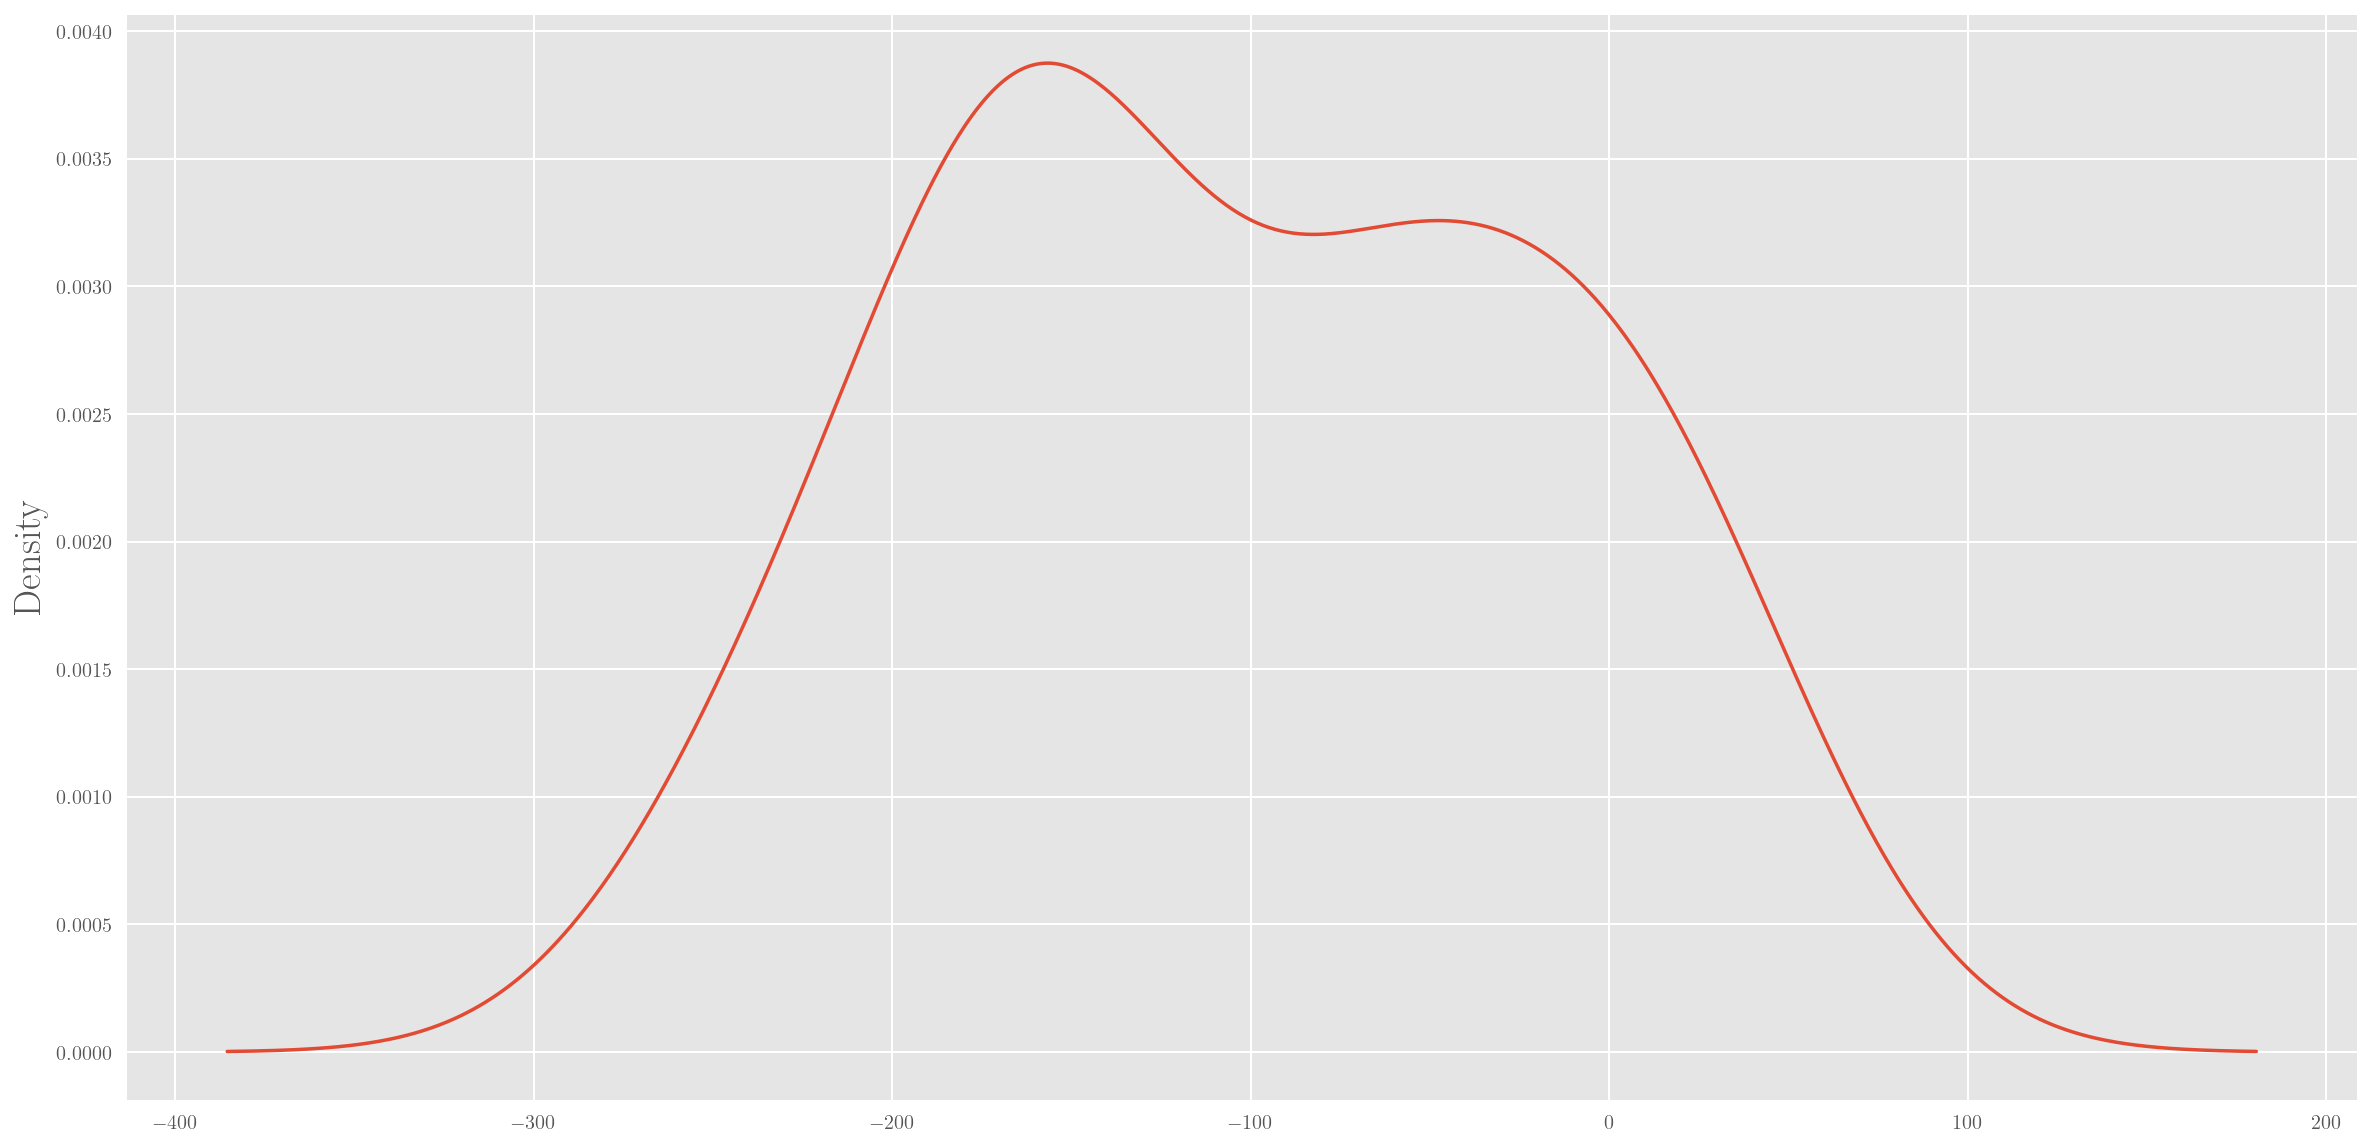

In [18]:
df['TMAX'].plot.kde()

## Summary

We've learned 

1. The different terminologies associated with a Dataframe. 
2. Load a dataset as a DataFrame
3. Inspect the data
4. Visualize the data

The datasets we used in this lab are considered `tidy data`. In general, the datasets need to be cleaned before meaningful insights can be extracted. In the following labs, we will learn different techniques to wrangle data.